In [3]:
import h5py
import os
import numpy as np
import SimpleITK as sitk
from tqdm import tqdm

os.chdir('/mnt/sda3/yigedabuliu/lkq/pytorch-3dunet/')
os.getcwd()

'/mnt/sda3/yigedabuliu/lkq/pytorch-3dunet'

In [4]:
from torch.utils.data import Dataset
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from BraTS import *

import matplotlib.pyplot as plt

In [150]:
# 测试构造标准的CHAOE类
from CHAOS import CHAOS_h5_Dataset

In [151]:
data_root = '/mnt/sda3/yigedabuliu/lkq/data/MR/CHAOS/h5_datasets/'
tr_dataset = CHAOS_h5_Dataset(data_root, data_aug=True, type='val', modal='T1DUAL_InPhase')
tr_dataloader = DataLoader(tr_dataset, batch_size=8, shuffle=True)


In [153]:
img, label = tr_dataloader.dataset[0]
label.dtype

torch.int64

In [163]:
# 输出非0值

# 找到非零元素
nonzero_values = torch.masked_select(label[:,:,22], label[:,:,22] != 0)

# 输出非零值
nonzero_values
for i in range(nonzero_values.shape[0]):
    print(nonzero_values[i])

tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)


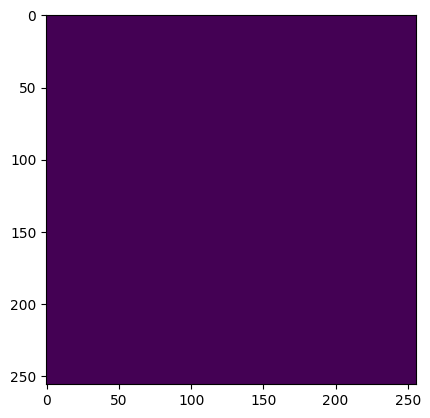

cur i is :0


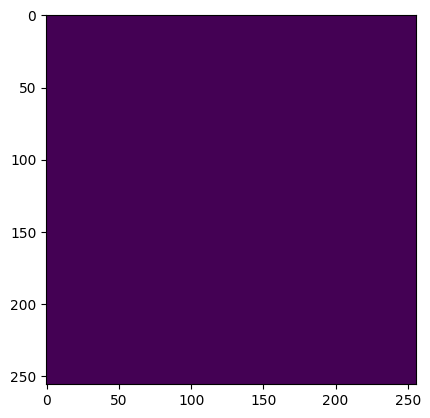

cur i is :1


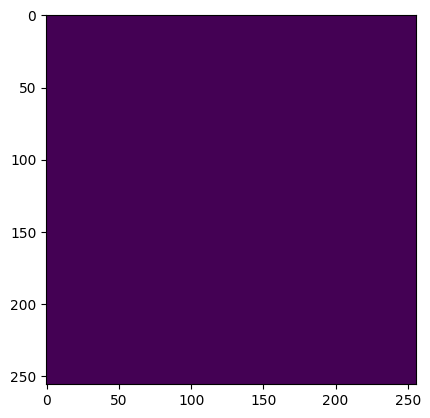

cur i is :2


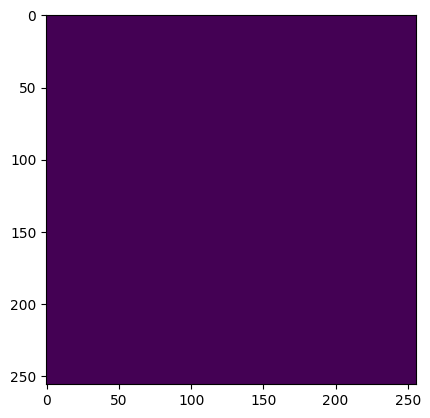

cur i is :3


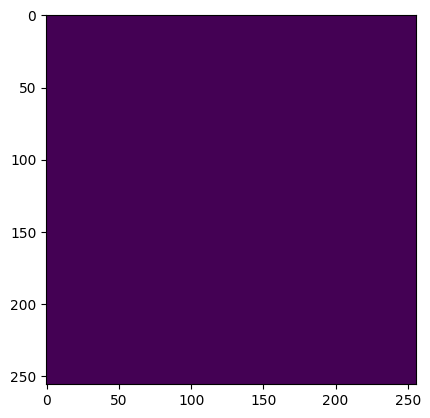

cur i is :4


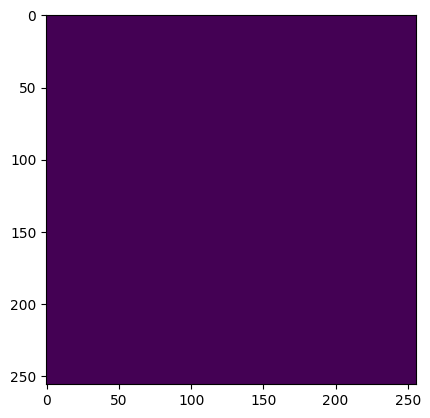

cur i is :5


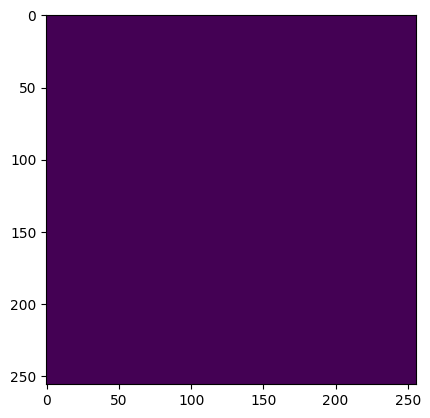

cur i is :6


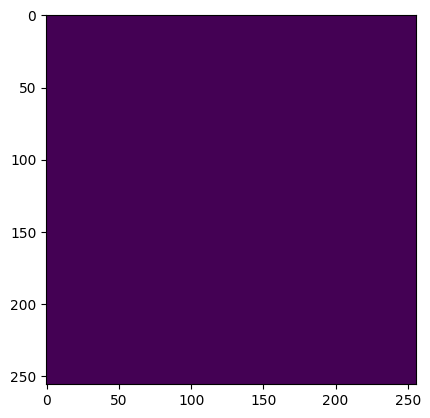

cur i is :7


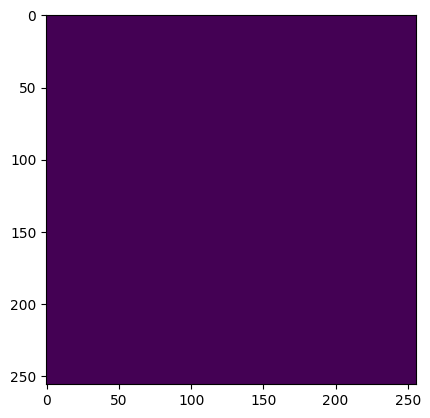

cur i is :8


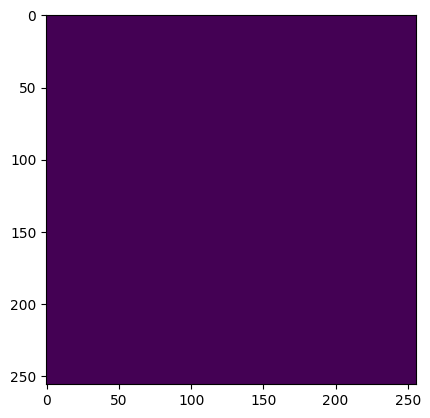

cur i is :9


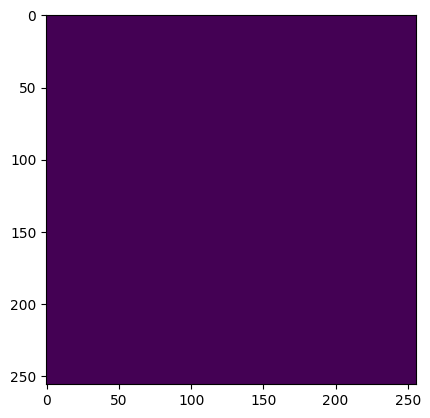

cur i is :10


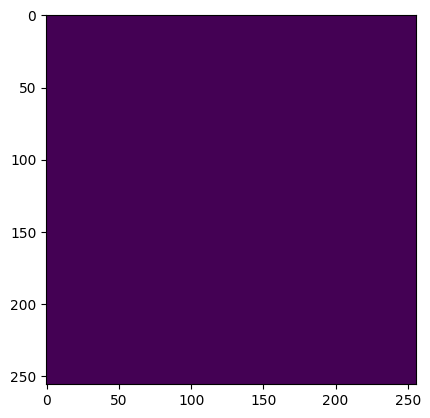

cur i is :11


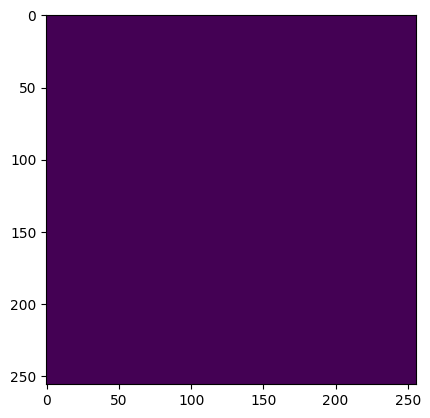

cur i is :12


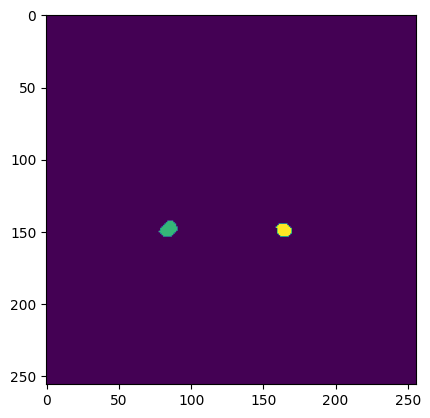

cur i is :13


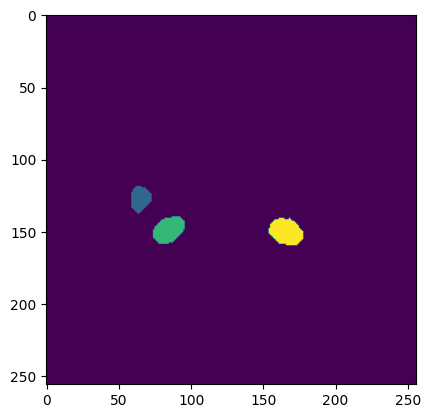

cur i is :14


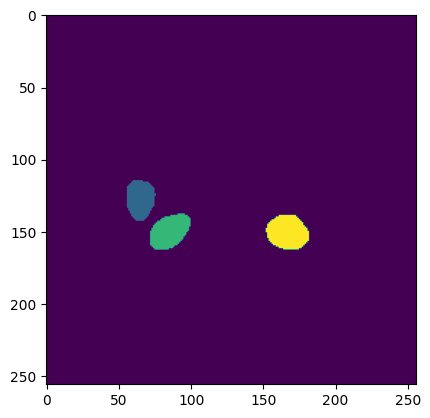

cur i is :15


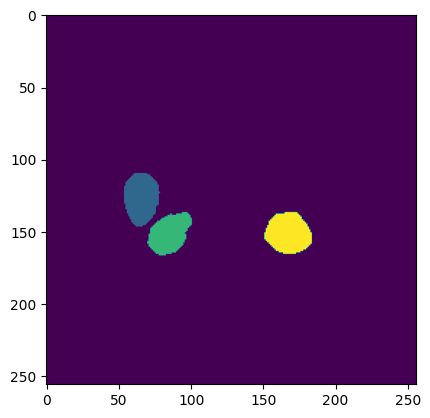

cur i is :16


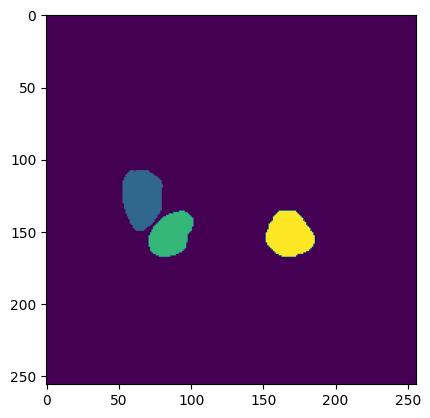

cur i is :17


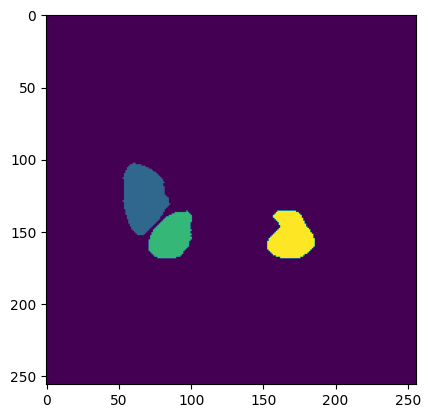

cur i is :18


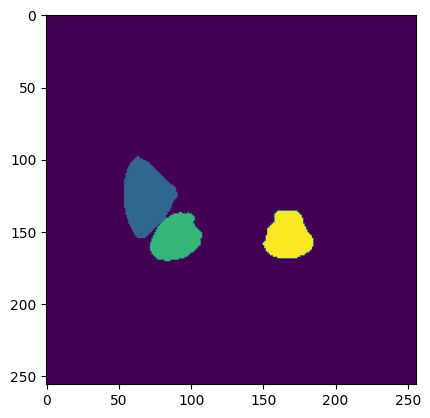

cur i is :19


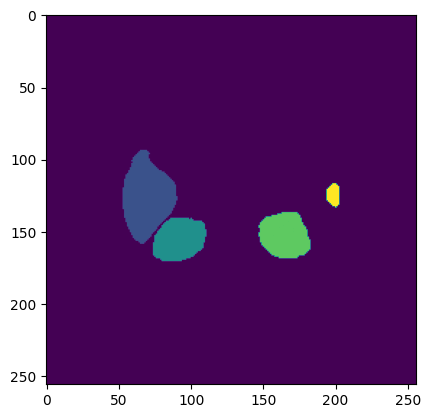

cur i is :20


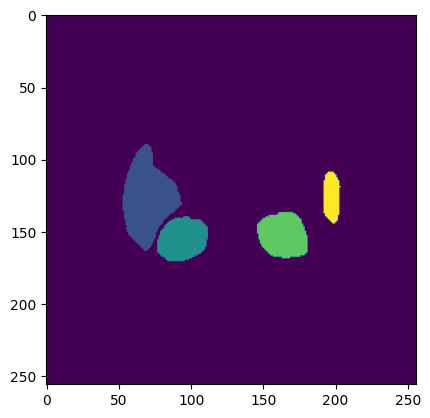

cur i is :21


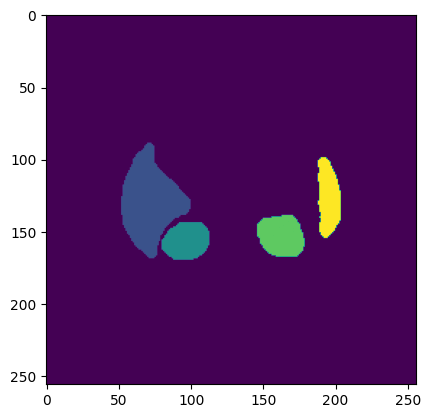

cur i is :22


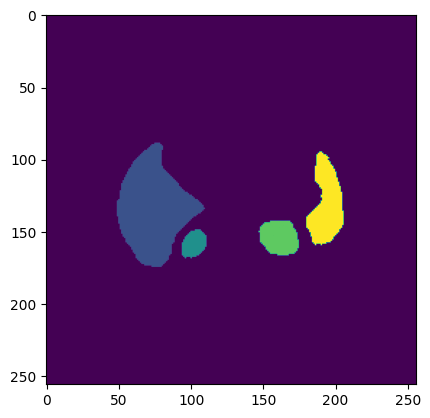

cur i is :23


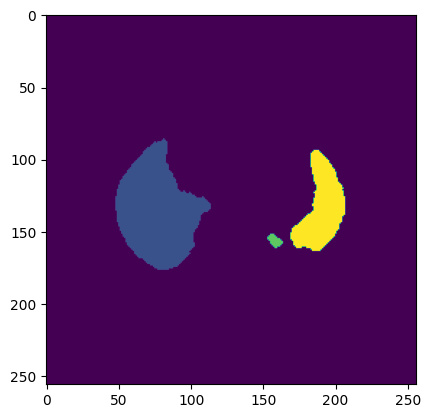

cur i is :24


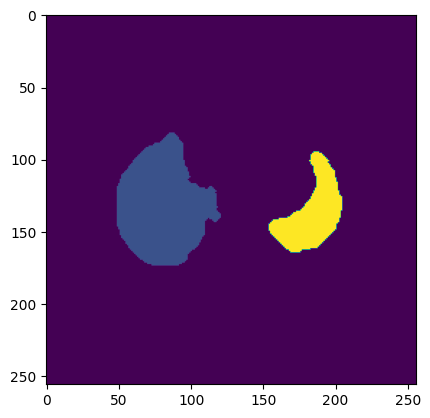

cur i is :25


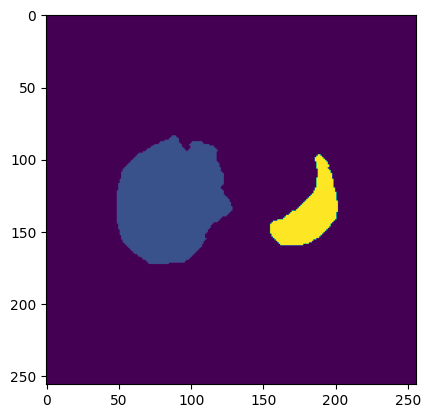

cur i is :26


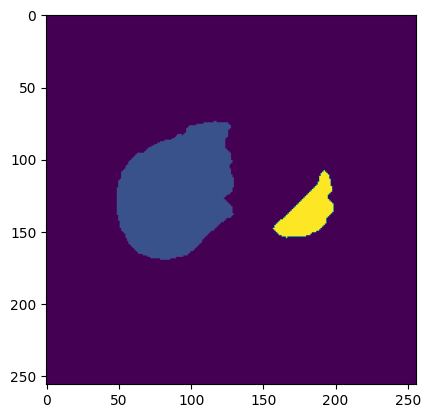

cur i is :27


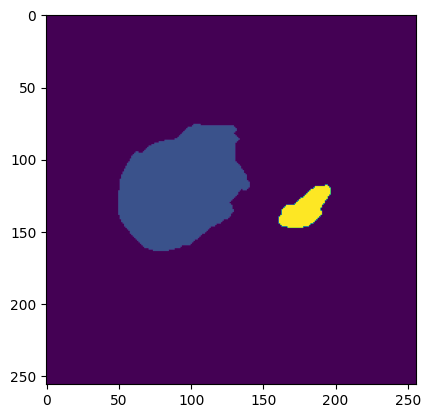

cur i is :28


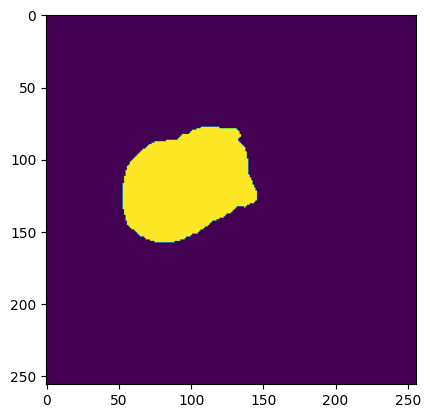

cur i is :29


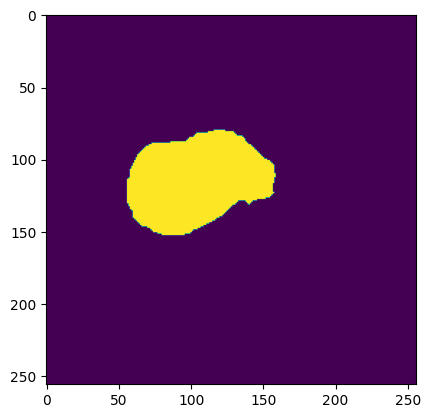

cur i is :30


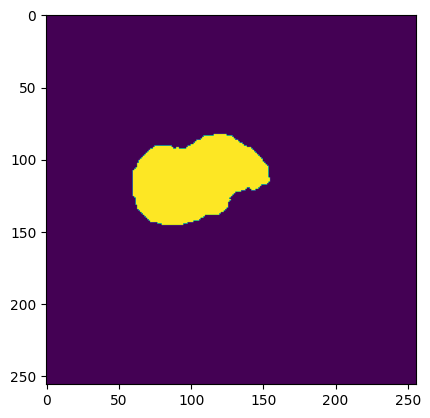

cur i is :31


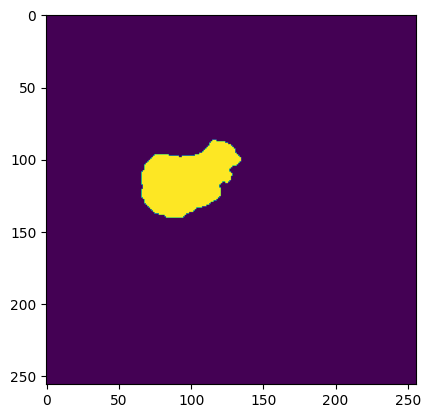

cur i is :32


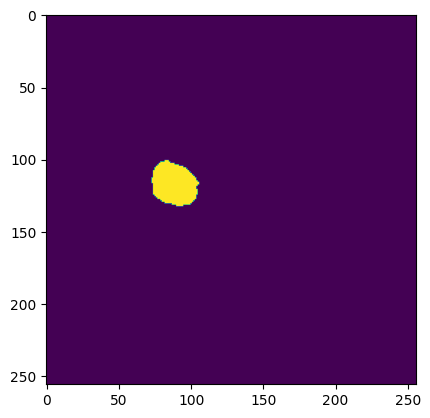

cur i is :33


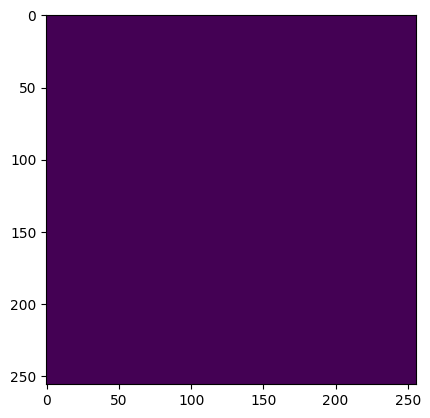

cur i is :34


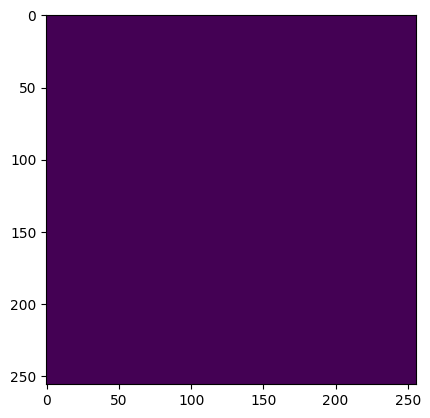

cur i is :35


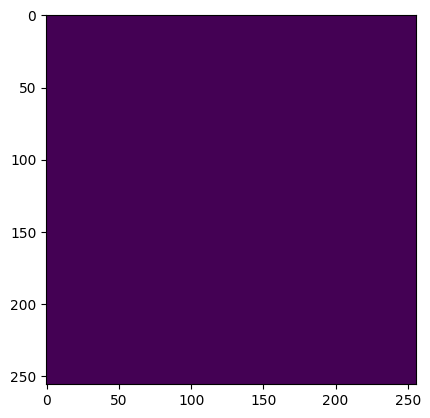

cur i is :36


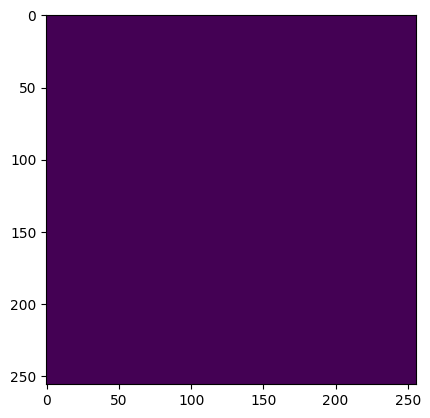

cur i is :37


In [160]:
for i in range(label.shape[-1]):
    plt.imshow(label[:,:,i])
    plt.show()
    print(f'cur i is :{i}')

In [123]:
l = len(tr_dataloader.dataset)
for i in range(l):
    img, label = tr_dataloader.dataset[i]
    print(f'img and lable shape:{img.shape, label.shape}')

img and lable shape:(torch.Size([1, 256, 256, 50]), torch.Size([256, 256, 50]))
img and lable shape:(torch.Size([1, 288, 288, 30]), torch.Size([288, 288, 30]))
img and lable shape:(torch.Size([1, 256, 256, 26]), torch.Size([256, 256, 26]))
img and lable shape:(torch.Size([1, 288, 288, 30]), torch.Size([288, 288, 30]))
img and lable shape:(torch.Size([1, 256, 256, 36]), torch.Size([256, 256, 36]))
img and lable shape:(torch.Size([1, 288, 288, 26]), torch.Size([288, 288, 26]))
img and lable shape:(torch.Size([1, 256, 256, 34]), torch.Size([256, 256, 34]))
img and lable shape:(torch.Size([1, 256, 256, 36]), torch.Size([256, 256, 36]))
img and lable shape:(torch.Size([1, 288, 288, 26]), torch.Size([288, 288, 26]))
img and lable shape:(torch.Size([1, 256, 256, 30]), torch.Size([256, 256, 30]))
img and lable shape:(torch.Size([1, 256, 256, 34]), torch.Size([256, 256, 34]))
img and lable shape:(torch.Size([1, 256, 256, 34]), torch.Size([256, 256, 34]))
img and lable shape:(torch.Size([1, 256,

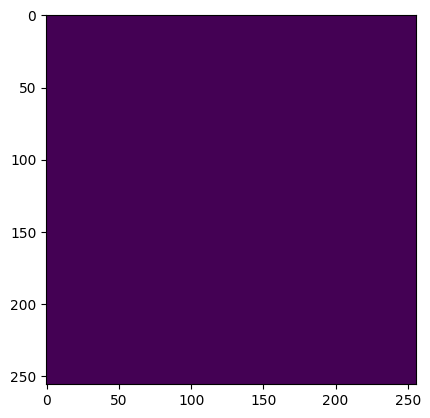

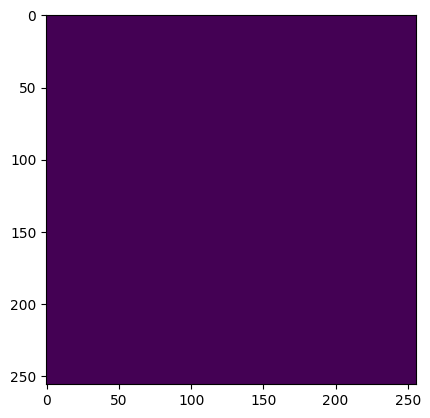

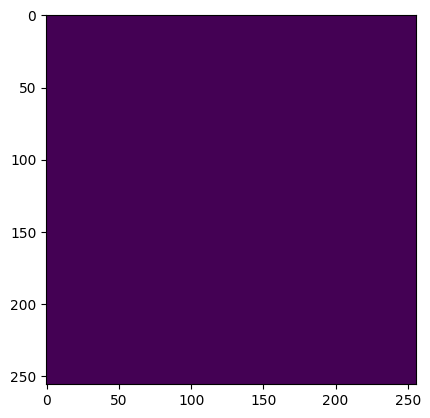

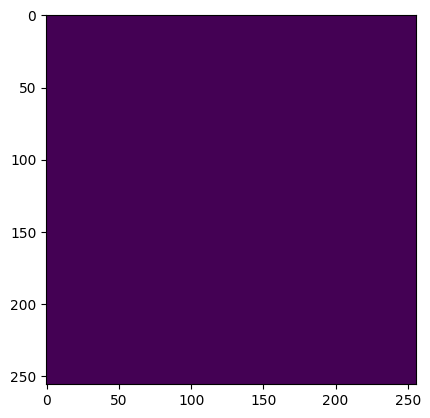

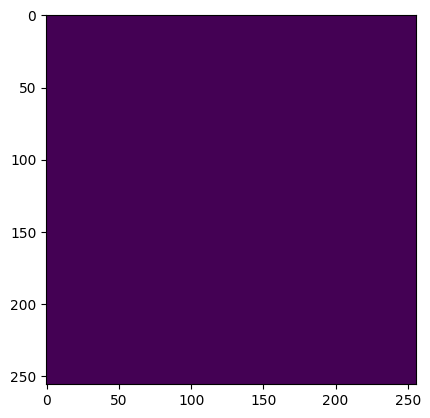

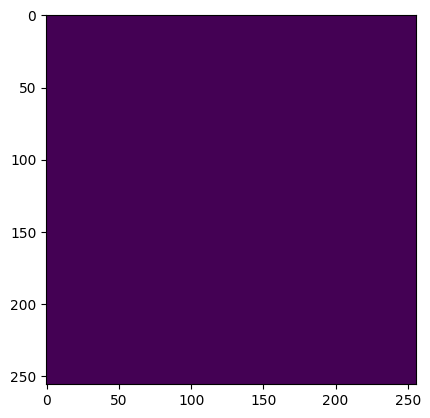

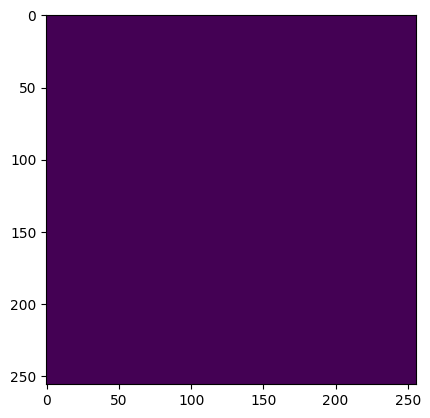

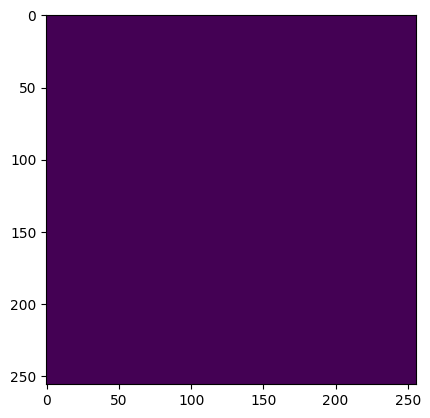

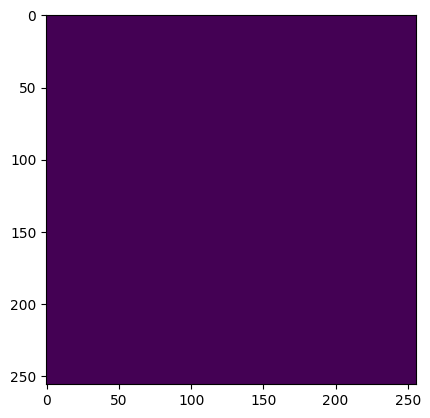

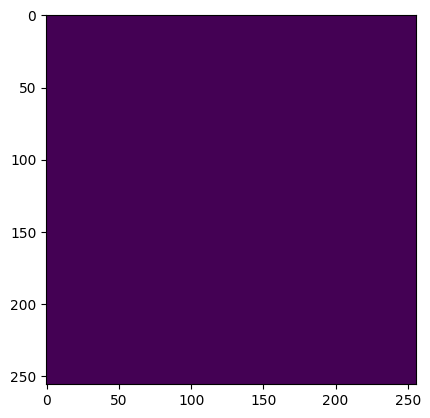

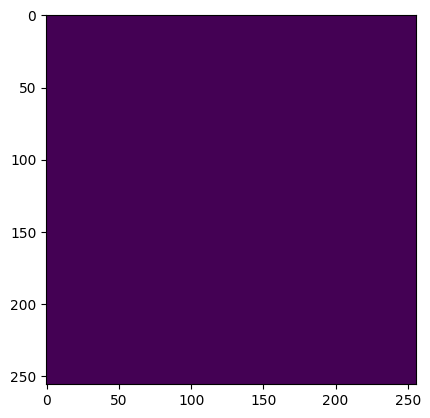

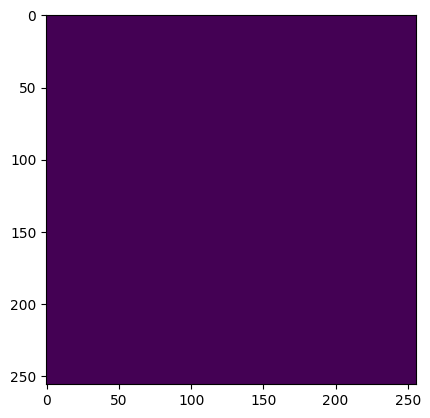

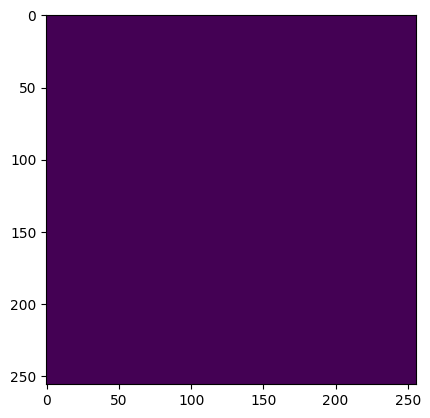

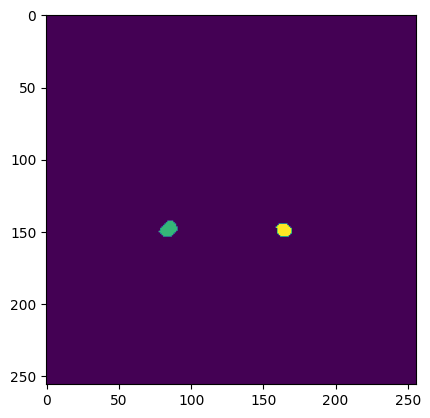

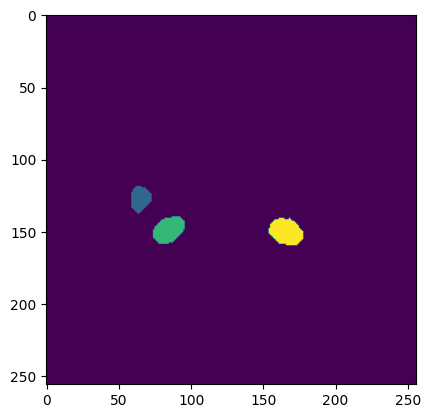

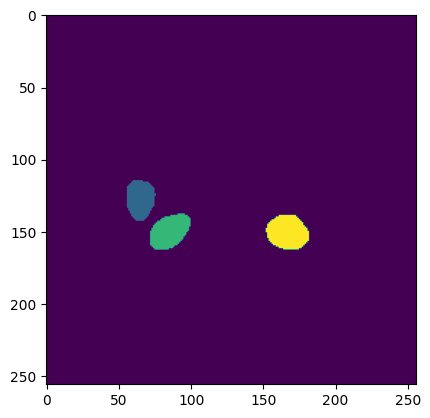

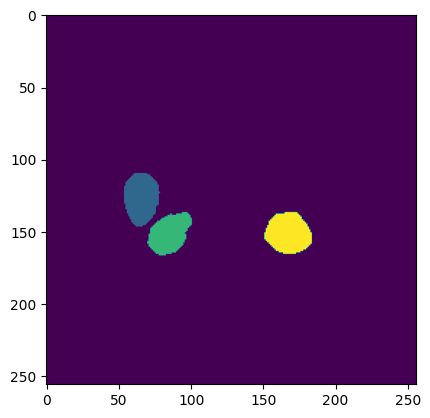

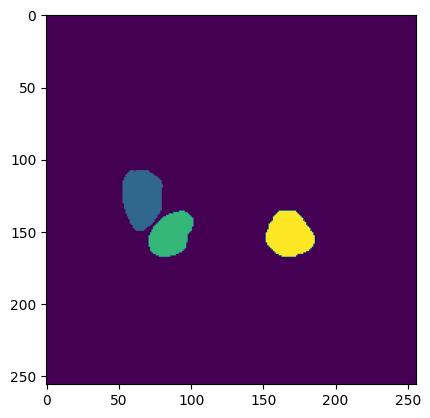

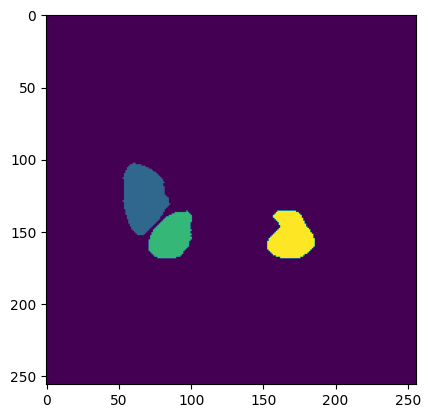

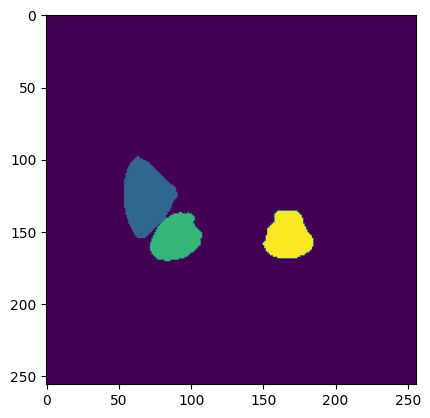

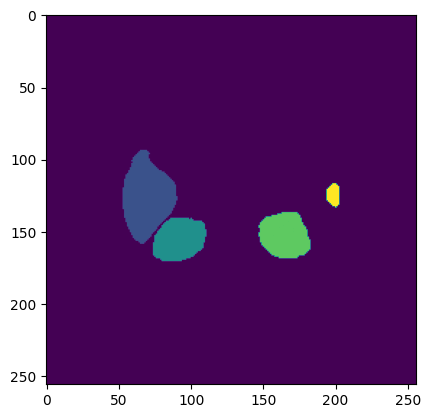

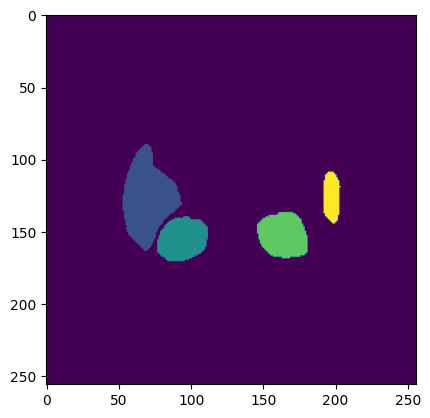

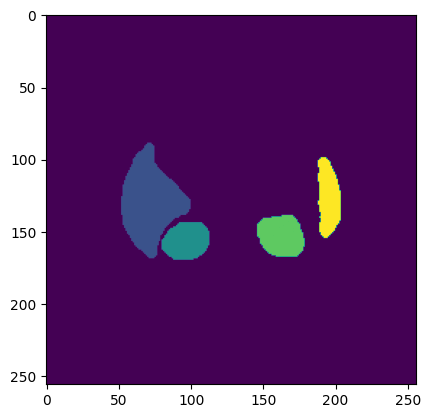

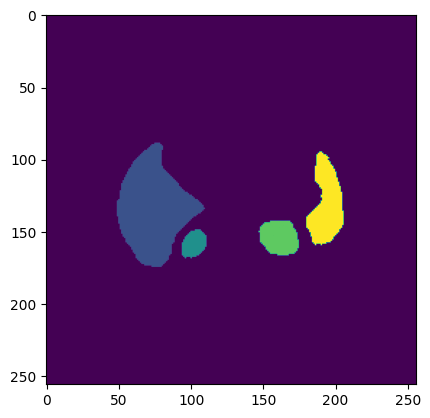

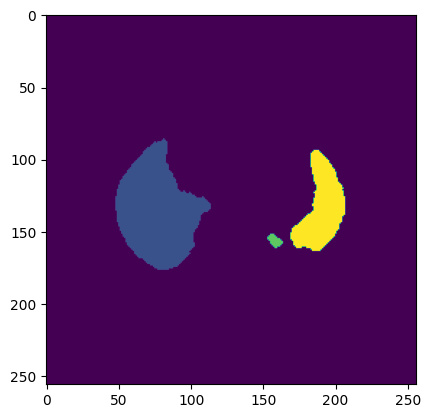

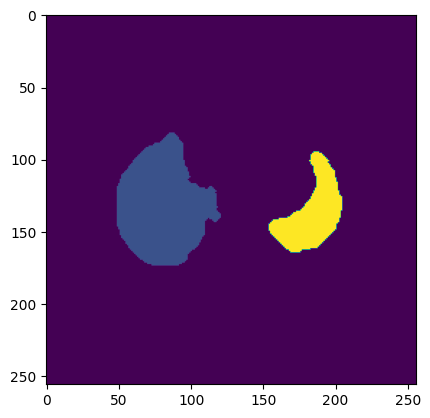

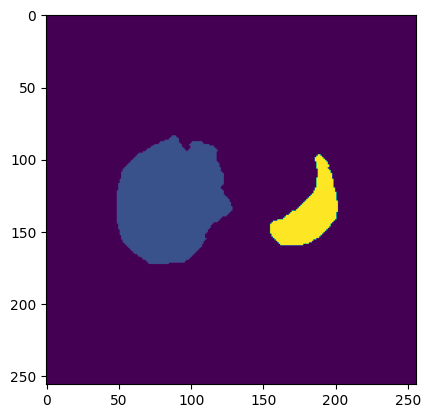

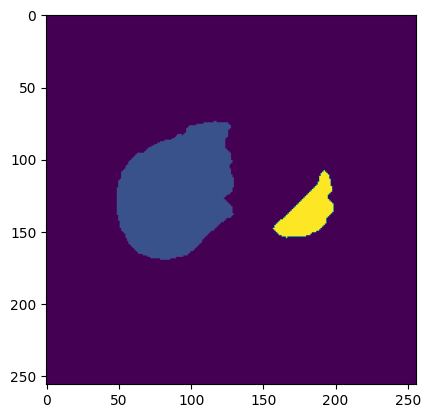

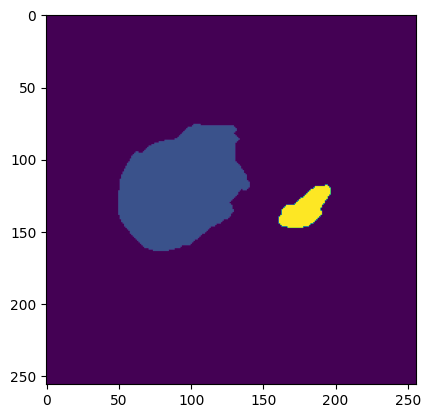

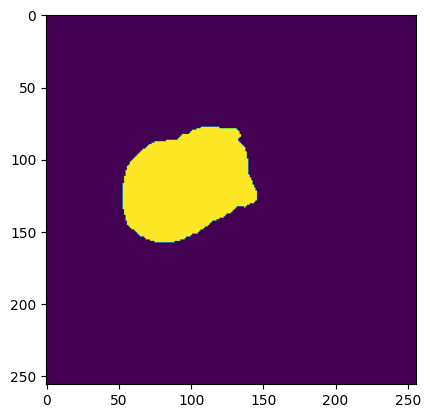

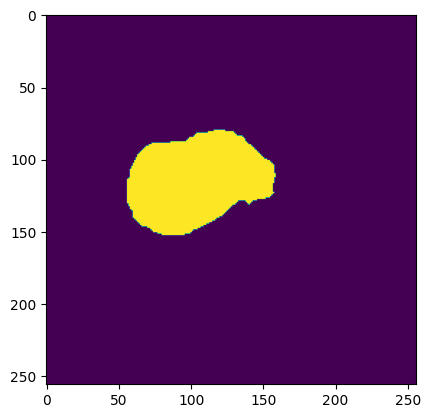

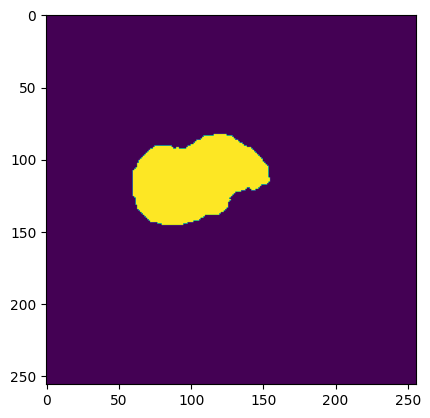

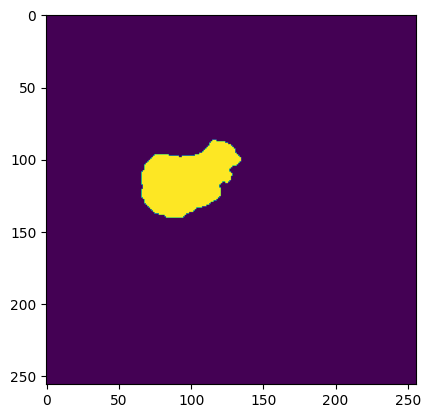

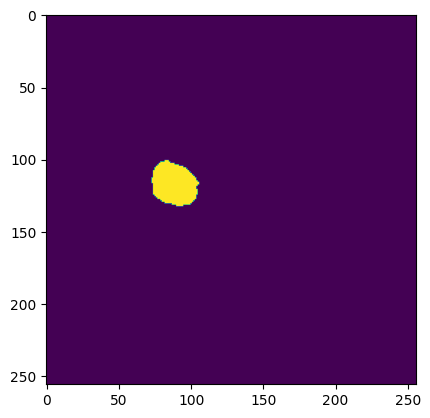

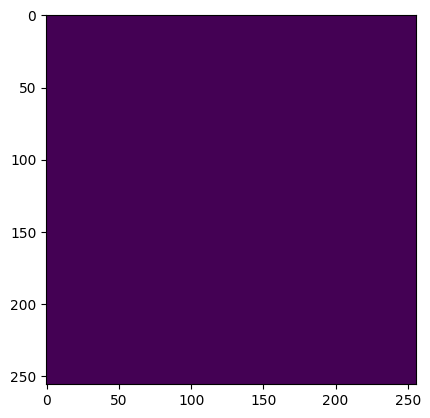

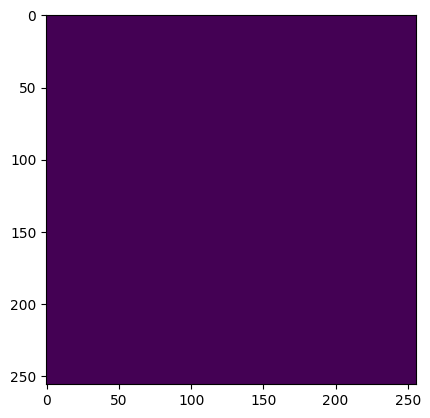

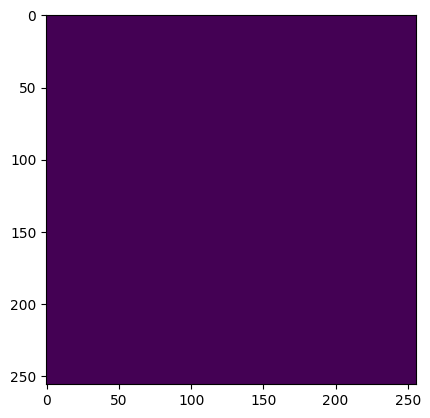

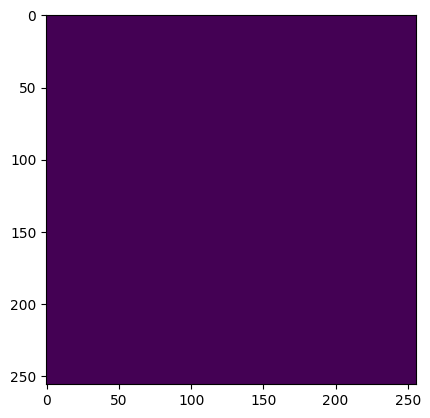

In [149]:
import matplotlib.pyplot as plt

for i in range(img.shape[-1]):
    plt.imshow(label[:, :, i])
    plt.show()

In [104]:
img.shape

torch.Size([1, 256, 256, 50])

In [105]:
label.shape

torch.Size([256, 256, 50])

In [87]:
img.shape

torch.Size([1, 256, 256, 50])

In [100]:
cavnas = torch.zeros(img.shape[:-1]).unsqueeze(dim=-1)
cavnas.shape

torch.Size([256, 256, 1])

In [98]:
out = torch.cat((img, cavnas), dim=-1)

In [99]:
out.shape

torch.Size([1, 256, 256, 51])